In [1]:
from jitfields.pushpull import pull, push, count, grad
from jitfields.resize import resize
from jitfields.utils import identity_grid, add_identity_grid_
import torch
import matplotlib.pyplot as plt

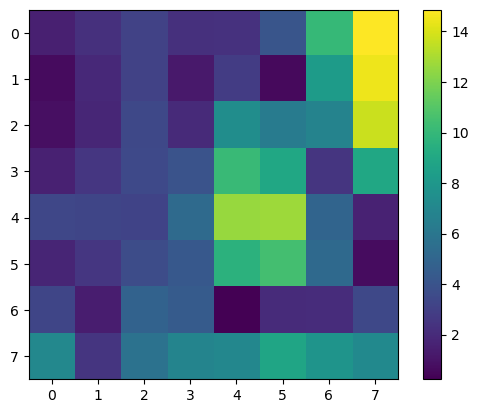

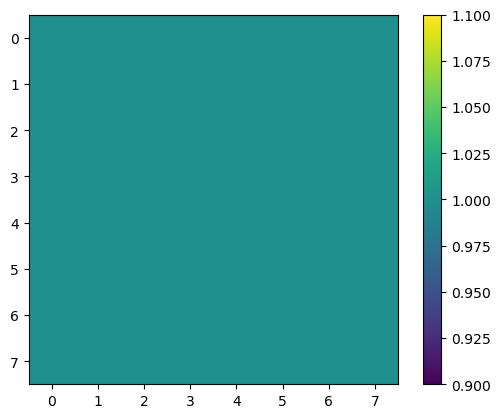

In [2]:
shape = [8, 8]

grid = resize(5 * torch.randn([2, 4, 4]), shape=shape, order=3).movedim(0, -1)

plt.imshow(grid.square().sum(-1).sqrt())
plt.colorbar()
plt.show()

grid = add_identity_grid_(grid)

circle = identity_grid([8, 8]).sub_(4)
circle = circle.square_().sum(-1).sqrt_()
circle = (circle < 6).float()

plt.imshow(circle)
plt.colorbar()
plt.show()

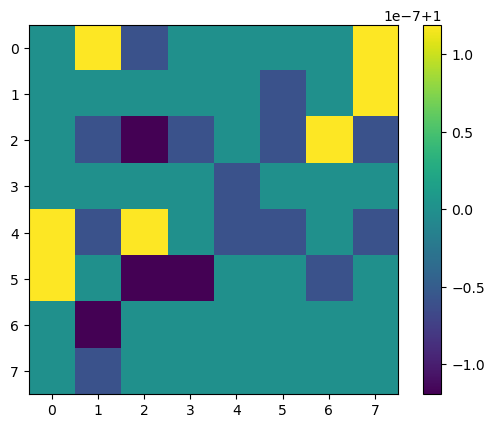

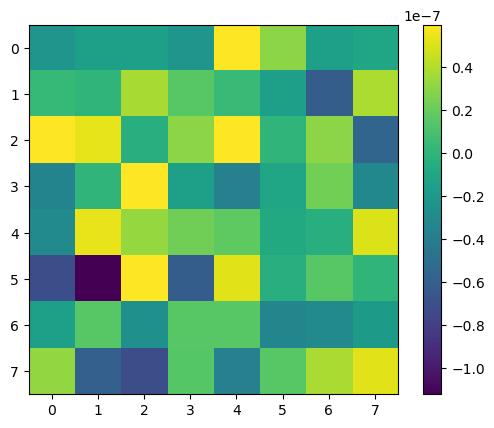

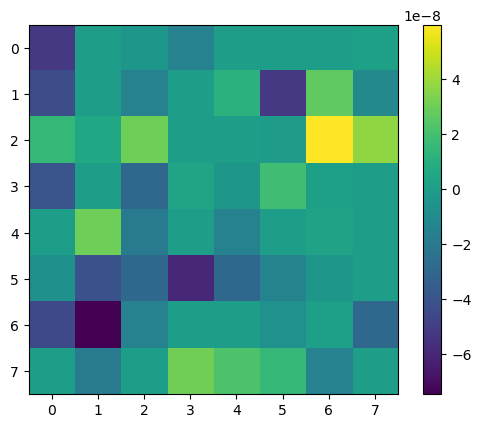

tensor(0.) tensor(0.)


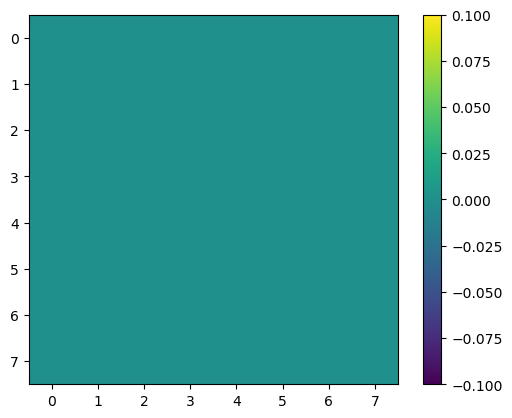

In [3]:
circle.requires_grad_()
grid.requires_grad_()

wircle = pull(circle[..., None], grid)[..., 0]

plt.imshow(wircle.detach())
plt.colorbar()
plt.show()

gircle = grad(circle[..., None], grid)[..., 0, :]

plt.imshow(gircle[..., 0].detach())
plt.colorbar()
plt.show()

plt.imshow(gircle[..., 1].detach())
plt.colorbar()
plt.show()

# plt.imshow(gircle[32, ..., 2].detach())
# plt.colorbar()
# plt.show()

#%

# wircle.requires_grad_()
wircle.square().sum().backward()
# print(wircle.grad.min(), wircle.grad.max())

plt.imshow(circle.grad)
plt.colorbar()
plt.show()

# plt.imshow(grid.grad.square().sum(-1).sqrt())
# plt.colorbar()
# plt.show()
#
# print(circle.grad.min(), circle.grad.max())
# print(grid.grad.min(), grid.grad.max())